# **LAB 3 - LINEAR REGRESSION AND SPAM SVM MODELS**
# <b><u>Linear Regression</u></b>

**# Regression Models**
Regression models are undoubtedly the most used of all learning algorithms. Developed from statistical analysis, regression models have quickly spread in ML and in AI in general. The most known and used regression model is linear regression, thanks to the simplicity of its implementation and the good predictive capacity that it allows us to achieve in many practical cases (such as estimating the level of house prices in relation to changes in interest rates).

Alongside the linear model, there is also the logistic regression model, especially useful in the most complex cases, where the linear model proves to be too rigid for the data to be treated. Both models, therefore, represent the tools of choice for analysts and algorithm developers.

In this section, we will analyze the characteristics and advantages of regression models, and their possible uses in the field of spam detection. Let's start our analysis with the simplest model, the linear regression model, which will help us make comparisons with the logistic regression model.

# **Introducing linear regression models**
The linear regression model is characterized by the fact that the data is represented as sums of features, leading to a straight line in the Cartesian plane.In formal terms, linear regression can be described by the following formula:

<img src=http://vbehzadan.com/AISec/linreg1.png width="150">

Here, y represents the predicted values, which are the result of the linear combination of the single features (represented by the X matrix) to which a weight vector is applied (represented by the w vector), and by the addition of a constant (β), which represents the default predicted value when all features assume the value of zero (or simply are missing).The β constant can also be interpreted as the systematic distortion of the model, and corresponds graphically with the intercept value on the vertical axis of the Cartesian plane (that is to say, the point where the regression line meets the vertical axis).Obviously, the linear model can be extended to cases in which there is more than just one feature. In this case, the mathematical formalization assumes the following aspect:

<img src=http://vbehzadan.com/AISec/linreg1.png width="150">

The geometric representation of the previous formula will correspond to a hyperplane in the n-dimensional space, rather than a straight line in the Cartesian plane. We have mentioned the importance of the  constant as the default predictive value of the model in the case in which the features assume a value equal to zero.

The individual w_i​​ values within the vector of the weights, , can be interpreted as a measure of the intensity of the corresponding features, x_i.

In practice, if the value of the w_i weight is close to zero, the corresponding x_i feature assumes a minimum importance (or none at all) in the determination of predicted values. If, instead, the w_i weight assumes positive values, it will amplify the final value returned by the regression model.

If, on the other hand, w_i assumes negative values, it will help to reverse the direction of the model's predictions, as the value of the x_i feature increases, it will correspond to a decrease in the value estimated by the regression. Hence, it is important to consider the impacts of the weights on the x_i features, as they are determinant in the correctness of the predictions that we can derive from the regression model.

**# Logistic Regression**
We have seen that one of the limits of linear regression is that it cannot be used to solve classification problems:

In fact, in case we wanted to use linear regression to classify the samples within two classes (as is the case in spam detection) whose labels are represented by numerical values ​​(for example, -1 for spam, and +1 for ham), the linear regression model will try to identify the result that is closest to the target value (that is, linear regression has the purpose of minimizing forecasting errors). The negative side effect of this behavior is that it leads to greater classification errors. With respect to the Perceptron, linear regression does not give us good results in terms of classification accuracy, precisely because linear regression works better with continuous intervals of values, rather than with classes of discrete values ​​(as is the case in classification).

An alternative strategy, most useful for the purposes of classification, consists of estimating the probability of the samples belonging to individual classes. This is the strategy adopted by logistic regression (which, in spite of the name, constitutes a classification algorithm, rather than a regression model).The mathematical formulation of logistic regression is as follows:

<img src=http://vbehzadan.com/AISec/logistic1.png width="200">

Where:

<img src=http://vbehzadan.com/AISec/logistic2.png width="150">

P(y=c|x) therefore measures the conditional probability that a given sample falls into the c class, given the x_i features.

In [0]:
#Import the libraries to be used in this lab
import pandas as pd
import numpy as np
from sklearn import *
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings 
warnings.simplefilter('ignore')


In [0]:
#Using the phishing_dataset, generate a numpy array using commas as a delimiter
phishing_dataset = np.genfromtxt('phishing_dataset.csv', delimiter=',', dtype=np.int32)

#X data referrs to samples and y data refers to targers
samples = phishing_dataset[:,:-1]
targets = phishing_dataset[:, -1]

In [0]:
#split the dataset into 4 smaller ones for taining and testing based on 25% of the dataset

from sklearn.model_selection import train_test_split

training_samples, testing_samples, training_targets, testing_targets = train_test_split(
         samples, targets, test_size=0.25, random_state=0)

In [0]:
#define that we want to use Logistic Regression
log_classifier = LogisticRegression()

In [0]:
#fit our model to the training data
log_classifier.fit(training_samples, training_targets)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predictions = log_classifier.predict(testing_samples)

In [0]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(testing_targets, predictions)


array([[1121,  128],
       [  84, 1431]])

Text(0.5, 257.44, 'Predicted label')

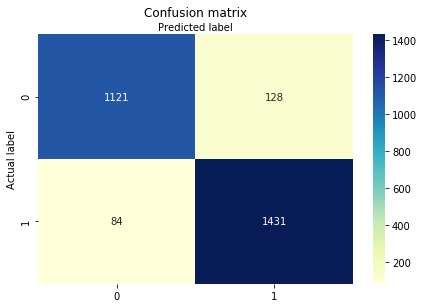

In [0]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


A confusion matrix is used to evaluate the performance of a classification model.  In our particular model, 1121 and 1431 are actual predictions and 128 and 84 are incorrect predictions

In [0]:
print("Accuracy:",metrics.accuracy_score(testing_targets, predictions)*100)
print("Precision:",metrics.precision_score(testing_targets, predictions)*100)
print("Recall:",metrics.recall_score(testing_targets, predictions)*100)

Accuracy: 92.32995658465991
Precision: 91.78960872354072
Recall: 94.45544554455445


Accuracy - By choosing a 25% test size, our model has an accuracy of approximately 92%

Precision - How often our model is correct when making a prediction.  Since this model applies to phishing data, our model is correct in identifying phishing 91% if the time.

Recall - If there are phishing instances in the test set, this model can identify them 94% of the time.

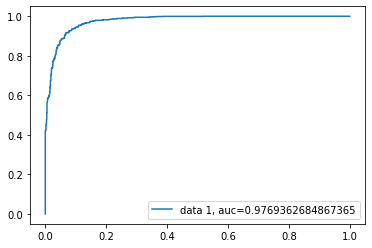

In [0]:
y_pred_proba = log_classifier.predict_proba(testing_samples)[::,1]
fpr, tpr, _ = metrics.roc_curve(testing_targets,  y_pred_proba)
auc = metrics.roc_auc_score(testing_targets, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

A Receiver Operating Characteristic (ROC) curve plots the true positive rate against the false positive rate.  An AUC score of 1 is a perfect classifier.  Our model has a 0.97 score indicating that this is a very good model for this type of data.

#<b><u>Support Vector Machines (SVM)</b></u>

SVMs are an example of supervised algorithms (as well as the Perceptron), whose task is to identify the hyperplane that best separates classes of data that can be represented in a multidimensional space. It is possible, however, to identify different hyperplanes that correctly separate the data from each other; in this case, the choice falls on the hyperplane that optimizes the prefixed margin, that is, the distance between the hyperplane and the data.One of the advantages of the SVM is that the identified hyperplane is not limited to the linear model (unlike the Perceptron), as shown in the following screenshot:

<img src=http://vbehzadan.com/AISec/SVM1.png width="300">

The SVM can be considered as an extension of the Perceptron, however. While in the case of the Perceptron, our goal was to minimize classification errors, in the case of SVM, our goal instead is to maximize the margin, that is, the distance between the hyperplane and the training data closest to the hyperplane (the nearest training data is thus known as a **support vector**).

**# SVM Optimization Strategy**
Why choose the hyperplane that maximizes the margin in the first place? The reason lies in the fact that wider margins correspond to fewer classification errors, while with narrower margins we risk incurring the phenomenon known as overfitting (a real disaster that we may incur when dealing with iterative algorithms, as we will see when we will discuss verification and optimization strategies for our AI solutions).We can translate the SVM optimization strategy in mathematical terms, similar to what we have done in the case of the Perceptron (which remains our starting point). We define the condition that must be met to assure that the SVM correctly identifies the best hyperplane that separates the classes of data:

<img src=http://vbehzadan.com/AISec/SVM2.png width="200">

Here, the β constant represents the bias, while µ represents our margin (which assumes the maximum possible positive value in order to obtain the best separation between the classes of values)

In practice, to the algebraic multiplication we add the value of the β bias, which allows us to obtain a value greater than or equal to zero, in the presence of values ​​that fall in the same class label (remember that y can only assume the values of ​​-1 or +1 to distinguish between the corresponding classes to which the samples belong, as we have already seen in the case of the Perceptron).

At this point, the value calculated in this way is compared with the Mu margin in order to ensure that the distance between each sample and the separating hyperplane we identified (thus constituting our decision boundary) is greater or at most equal to our margin (which, as we have seen, is identified as the maximum possible positive value, in order to obtain the best separation between the classes of values).

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  

df = pd.read_csv('sms_spam_svm.csv')

y = df.iloc[:, 0].values

#if y is equal to spam, giving it the label -1, otherwise given 1
y = np.where(y == 'spam', -1, 1)

X = df.iloc[:, [1, 2]].values

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.25, random_state=0)

In [0]:
from sklearn.svm import SVC
# c is a regularization parameter; set of techniques that enhance the generalizability of the model
#random_state is the starting seed used to shuffle the data using a random number generator
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

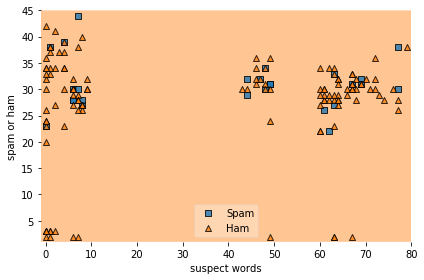

In [0]:
# Thanks to Sebastian Raschka for 'plot_decision_regions'
# https://github.com/rasbt/python-machine-learning-book
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

ax = plot_decision_regions(X_combined, y_combined,
                      clf=svm, legend=0)

plt.xlabel('suspect words')
plt.ylabel('spam or ham')
plt.legend(loc='upper right')
plt.tight_layout()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, 
          ['Spam', 'Ham'], 
           framealpha=0.3, scatterpoints=1)
plt.show()

In [0]:
from sklearn.metrics import accuracy_score

print('Misclassified samples: %d' % (y_test != y_pred).sum())
accuracy = accuracy_score(y_test, y_pred)*100
print ('Accuracy: %.2f' % accuracy +"%")

Misclassified samples: 6
Accuracy: 84.21%
